## Decision tree exercise

En este ejercicio se utilizará un árbol de decisión para procesar un dataset y ejecutar una clasificación.

El dataset que se utilizará es el *Diabetes dataset*, tiene 8 variables explicativas y la variable target (Outcome) que indica si la persona tiene diabetes o no.

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz #Para visualizar el arbol
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

#### To do

+ Leer info del csv y hacer un peek

+ dividir en entrenamiento, validacion y test

+ entrenar el arbol y ver desempeño con ciertos parámetros (validación)

+ clasificar a test y ver desempeño y dibujar el árbol.

Importar el dataset y especificar que "?" es un valor NaN en este dataset.

In [20]:
df = pd.read_csv("diabetes.csv",header=0, na_values = "?")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


División del dataset a train, test:

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

In [22]:
#Hacer la vida más fácil usando matrices de numpy

X_trainM = X_train.as_matrix()
Y_trainM = Y_train.as_matrix()

X_testM = X_test.as_matrix()
Y_testM = Y_test.as_matrix()

Crear el clasificador y hacerle fit con los datos de entrenamiento.

El clasificador default utiliza gini para hacer las divisiones y  min_samples_split = 2

In [24]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_trainM, Y_trainM)

Predecir directamente la clase con más alta probabilidad de ser.

In [29]:
Y_test_prediction = clf.predict(X_testM)

In [58]:
cm = confusion_matrix(Y_testM, Y_test_prediction)
cm

array([[89, 34],
       [30, 39]])

In [81]:
#Accuracy (num buenos/total)
accuracy = float(cm[0][0] + cm[1][1]) / float(cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])

#Precision

precision = float(cm[0][0])/float(cm[0][0] + cm[0][1])

#Recall

recall = float(cm[0][0])/float(cm[0][0] + cm[1][0])

In [80]:
accuracy

0.6666666666666666

In [79]:
precision

0.7235772357723578

In [82]:
recall

0.7478991596638656

Visualización del árbol

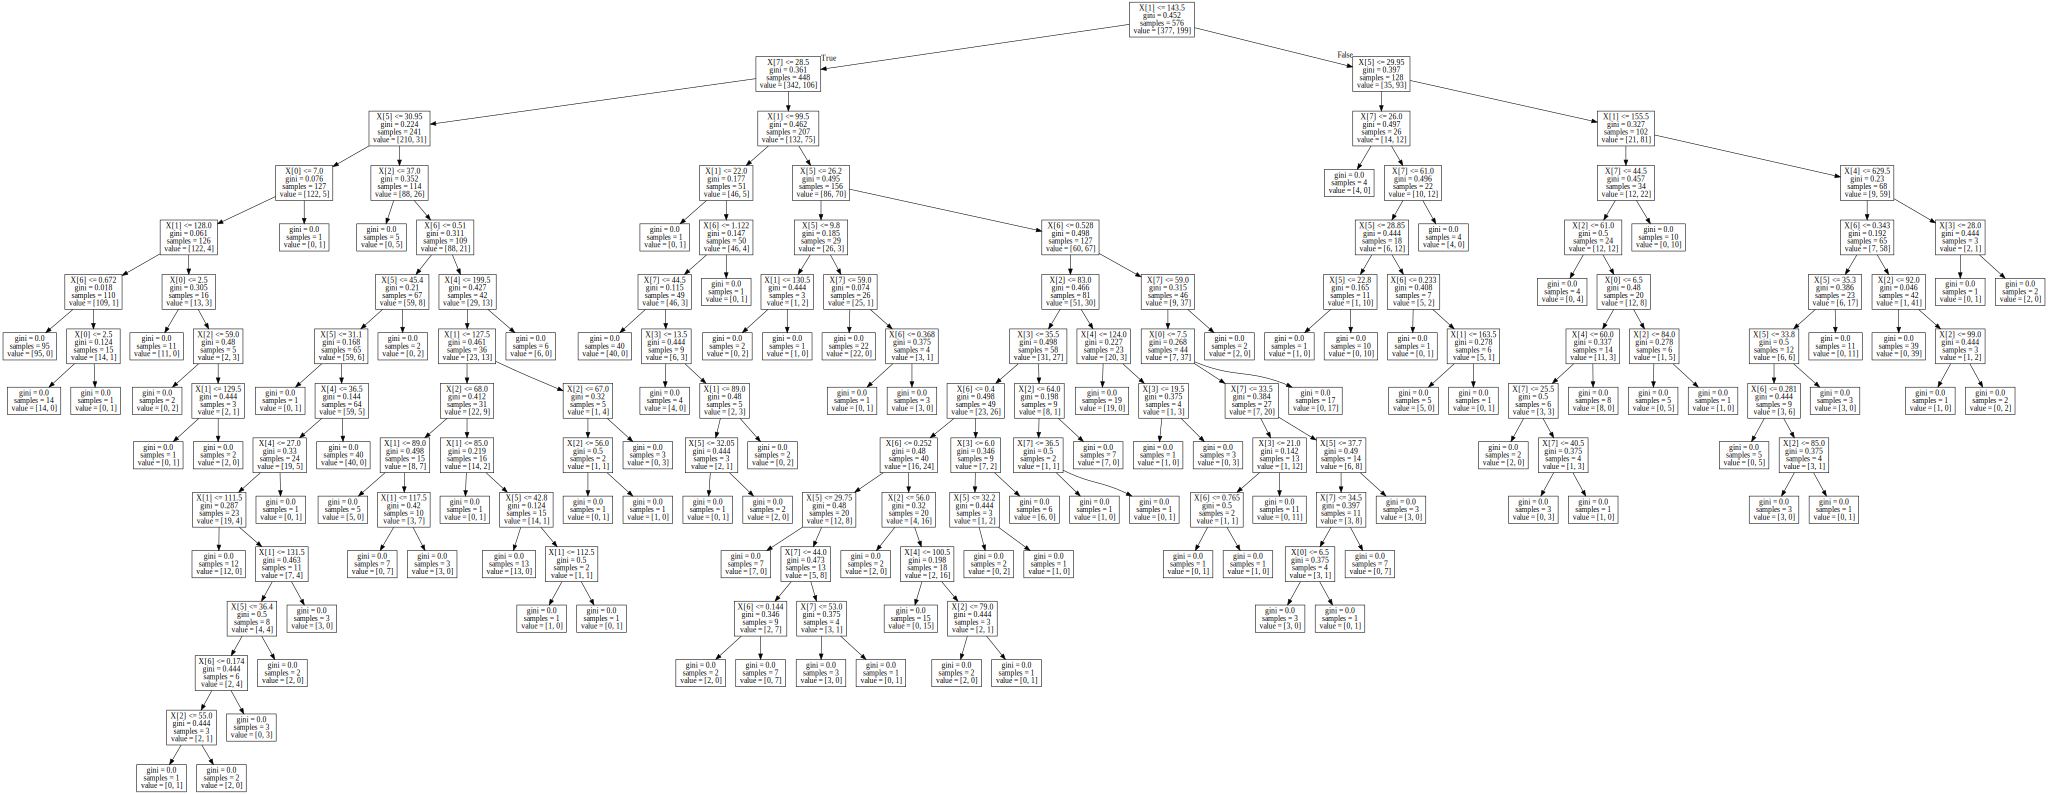

In [103]:
diabetes_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(diabetes_data, format="pdf", engine="dot")
graph

Si se le especifica archivo *export_graphviz*, se puede obtener la siguiente imagen utilizando http://webgraphviz.com/

![Árbol](treeImage.png)